# < Hotel booking demand>  
- kaggle Link : https://www.kaggle.com/jessemostipak/hotel-booking-demand
- 분석 목적 : 호텔 객식 예약 및 취소에 대한 정보 분석

- Context  
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

- Content  
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

- Acknowledgements  
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# pandas 데이터 프레임 내에서 누락 된 데이터의 존재와 분포를 이해하기 위해 일련의 시각화를 제공하는 사용하기 쉬운 Python 라이브

In [166]:
# sklearn 라이브러리 import
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
df = pd.read_csv('./hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [169]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 데이터 확인 및 전처리

In [171]:
# 결측치 데이터가 있음을 확인
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [172]:
df.fillna(0, inplace = True)

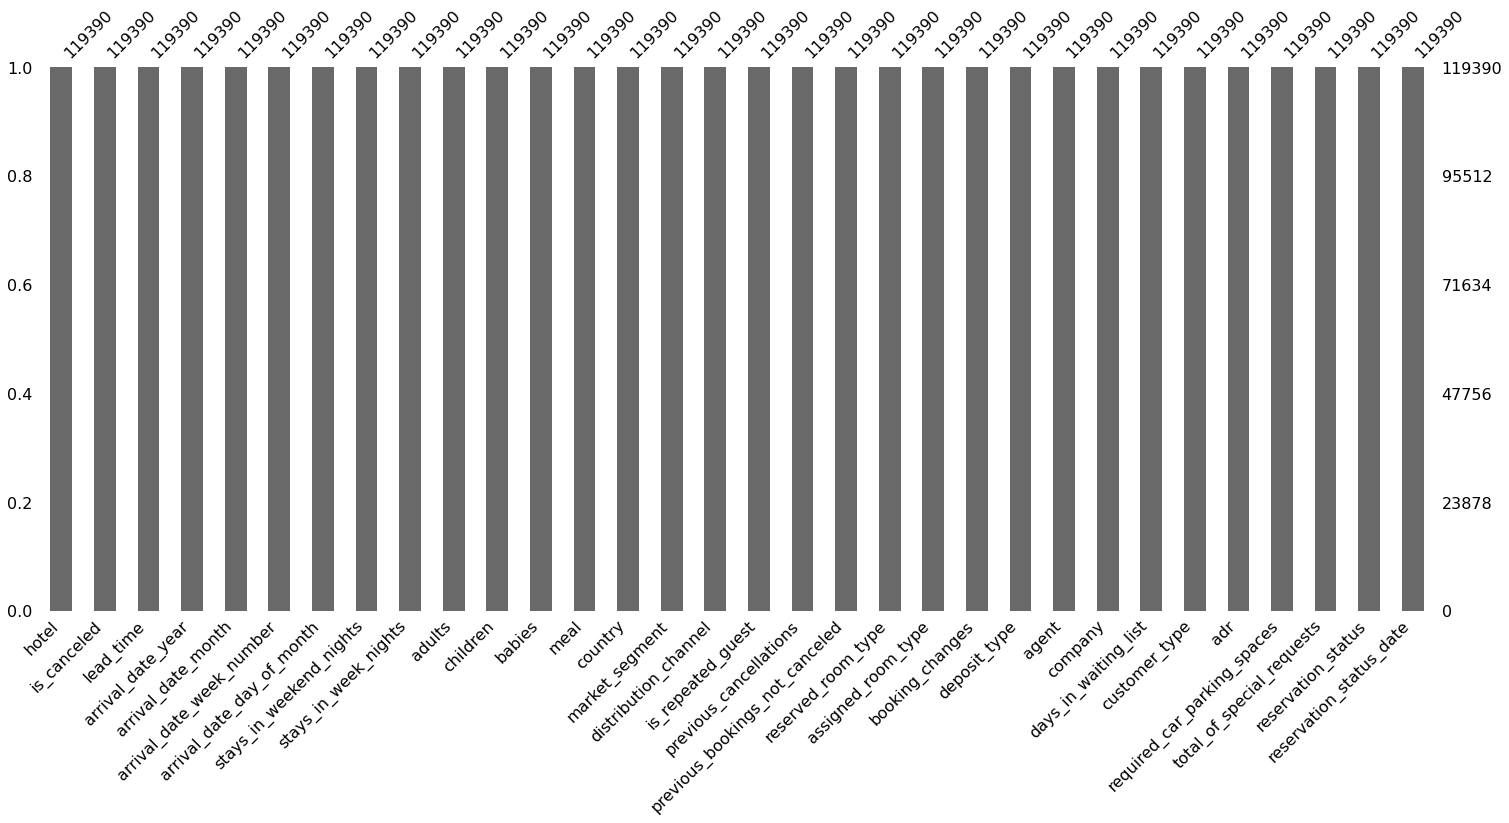

In [173]:
# 결측값 처리 후 msno로 확인
msno.bar(df)
plt.show()

In [174]:
# 결측 데이터일 경우 (adults, babies, children 모두 0인 경우)
filter = (df.children == 0)& (df.adults == 0) &(df.babies == 0)
df[filter].shape # 결측 데이터

(180, 32)

In [175]:
df[~filter].shape

(119210, 32)

## 도시별로 고객이 얼마나 오는지 확인

In [176]:
# 도시별로 예약건 분류
df[df['is_canceled'] == 0]['country'].value_counts() 

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 166, dtype: int64

In [177]:
df[df['is_canceled'] == 0]['country'].value_counts().reset_index()

,index,country
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [178]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()

In [179]:
country_wise_guests.columns = ['country', 'No of guests']

# 500명 이상 방문한 호텔을 시각화
country_wise_guests = country_wise_guests[country_wise_guests['No of guests'] > 500]

In [180]:
import plotly.express as px

In [181]:
fig = px.pie(country_wise_guests,values = "No of guests",
            names = 'country',
            title = "Home country of guests",
            template = "seaborn")
fig.show()

In [182]:
import folium
from folium.plugins import HeatMap
import plotly.express as px


In [183]:
#basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

## 월별로 객실 요금 알아보기

In [184]:
data = df[df['is_canceled'] == 0]

In [185]:
df[df['is_canceled'] == 0]['reserved_room_type']

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type, Length: 75166, dtype: object

In [186]:
# 객실 요금
px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

In [187]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0 ) == 0]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0 ) == 0]

In [188]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [189]:
resort_hotel

,arrival_date_month,adr
0,April,107.701095
1,August,127.508476
2,December,86.477974
3,February,81.369691
4,January,80.320990
5,July,119.102127
6,June,118.675693
7,March,89.112771
8,May,117.469957
9,November,84.094655


In [190]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [191]:
city_hotel

,arrival_date_month,adr
0,April,93.867321
1,August,153.855012
2,December,77.380848
3,February,65.866709
4,January,63.124280
5,July,133.600316
6,June,115.988110
7,March,73.925423
8,May,101.235069
9,November,65.436247


In [192]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')

In [193]:
final_hotel.columns = ['month','price_for_resort','price_for_city_hotel']

In [194]:
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,107.701095,93.867321
1,August,127.508476,153.855012
2,December,86.477974,77.380848
3,February,81.369691,65.866709
4,January,80.320990,63.124280
5,July,119.102127,133.600316
6,June,118.675693,115.988110
7,March,89.112771,73.925423
8,May,117.469957,101.235069
9,November,84.094655,65.436247


In [195]:
# 월별로 정렬해서 객실 요금 확인해보기
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df,column_name)


In [196]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,80.320990,63.124280
1,February,81.369691,65.866709
2,March,89.112771,73.925423
3,April,107.701095,93.867321
4,May,117.469957,101.235069
5,June,118.675693,115.988110
6,July,119.102127,133.600316
7,August,127.508476,153.855012
8,September,107.208370,99.841499
9,October,95.769697,79.113422


In [197]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1224x576 with 0 Axes>

## 월별 고객 수 예측

In [198]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()

In [199]:
resort_guests.columns = ['month','no of guests']
resort_guests

,month,no of guests
0,August,10620
1,July,9524
2,May,9256
3,June,8901
4,October,8583
5,April,8539
6,September,8406
7,March,7221
8,February,5760
9,November,4818


In [200]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()

In [201]:
city_guests.columns = ['month','no of guests']
city_guests

,month,no of guests
0,August,8496
1,July,7879
2,May,7212
3,April,7074
4,October,6823
5,June,6573
6,September,6218
7,March,5722
8,February,5004
9,December,4388


In [202]:
final_guests = resort_guests.merge(city_guests,on = 'month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,10620,8496
1,July,9524,7879
2,May,9256,7212
3,June,8901,6573
4,October,8583,6823
5,April,8539,7074
6,September,8406,6218
7,March,7221,5722
8,February,5760,5004
9,November,4818,4098


In [203]:
final_guests = sort_month(final_guests, 'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,4061,3675
1,February,5760,5004
2,March,7221,5722
3,April,8539,7074
4,May,9256,7212
5,June,8901,6573
6,July,9524,7879
7,August,10620,8496
8,September,8406,6218
9,October,8583,6823


In [204]:
px.line(final_guests , x = 'month', y = ['no of guests in resort','no of guest in city hotel'], title = 'Total no of guests per Months',template = 'plotly_dark')

## 숙박기간 확인

In [205]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [206]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

In [207]:
data['total_nights'].head()

0    0
1    0
2    1
3    1
4    2
Name: total_nights, dtype: int64

In [208]:
stay = data.groupby(['total_nights','hotel']).agg('count').reset_index()

In [209]:
stay.head()

,total_nights,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,City Hotel,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308
1,0,Resort Hotel,372,372,372,372,372,372,372,372,...,372,372,372,372,372,372,372,372,372,372
2,1,City Hotel,9169,9169,9169,9169,9169,9169,9169,9169,...,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169
3,1,Resort Hotel,6580,6580,6580,6580,6580,6580,6580,6580,...,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580
4,2,City Hotel,10992,10992,10992,10992,10992,10992,10992,10992,...,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992


In [210]:
stay = stay.iloc[:,:3]
stay = stay.rename(columns = {'is_canceled': 'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


In [211]:
px.bar(data_frame= stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group', template = 'plotly_dark')

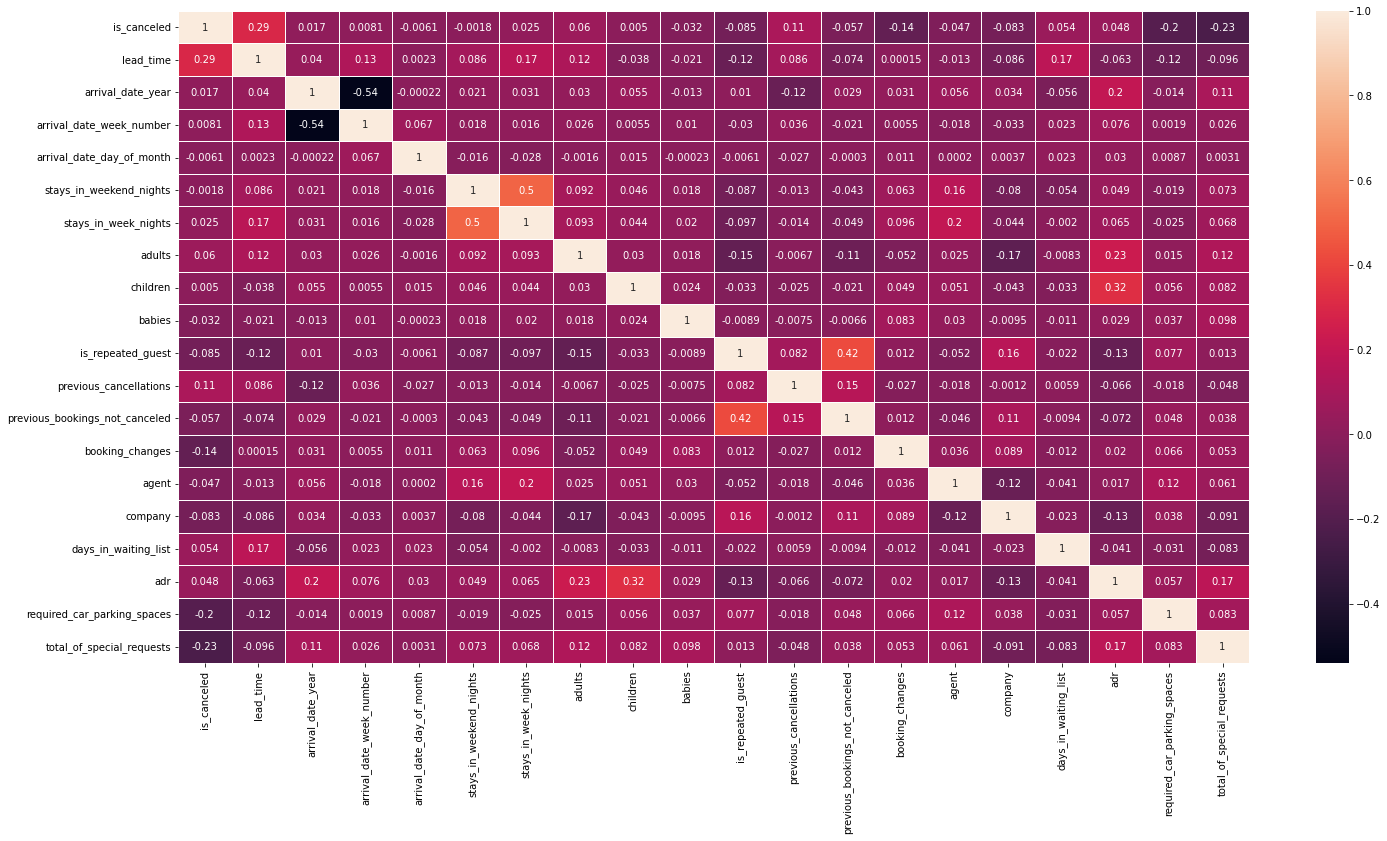

In [212]:
plt.figure(figsize = (24,12))
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

## 변수 간의 상관관계 파악해서 useless_col은 삭제

In [213]:
# 상관관계 파악해보기

correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [214]:
# 유용하지 않은 컬럼 삭제하기

useless_col = ['days_in_waiting_list', 'arrival_date_year','arrival_date_year', 'assigned_room_type','booking_changes','reservation_status','country','days_in_waiting_list']

In [215]:
df.drop(useless_col, axis = 1, inplace = True)

In [216]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,C,No Deposit,0.0,0.0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,A,No Deposit,0.0,0.0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,A,No Deposit,304.0,0.0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,A,No Deposit,240.0,0.0,Transient,98.0,0,1,2015-07-03


In [217]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(col)

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_df = df[cat_cols]
cat_df.head()

hotel
arrival_date_month
meal
market_segment
distribution_channel
reserved_room_type
deposit_type
customer_type
reservation_status_date


,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [218]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

In [219]:
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [220]:
cat_df.drop(['reservation_status_date','arrival_date_month'], axis = 1, inplace = True)

In [221]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [222]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [223]:
# encoding 작업 왜 해주는건가요
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel': 0, 'City Hotel':1})

In [224]:
cat_df['meal'] = cat_df['meal'].map({'BB': 0, 'FB': 1, 'HB':2, 'SC':3, 'Undefined':4})
cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

In [225]:
cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})


In [226]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0.0,0,0,0,7,1
1,0,0,0,0,0.0,0,0,0,7,1
2,0,0,0,0,1.0,0,0,0,7,2
3,0,0,1,1,1.0,0,0,0,7,2
4,0,0,2,2,1.0,0,0,0,7,3


In [227]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [228]:
num_df.var()

lead_time                         11419.721511
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
children                              0.158846
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
agent                             11479.398119
company                            2909.942594
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
dtype: float64

In [229]:
# np.log를 이용해서 normalizing numerical variables


num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [230]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [231]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1


In [232]:
# x,y 데이터 설정
X = pd.concat([cat_df,num_df],axis = 1)
y = df['is_canceled']

In [233]:
X.shape, y.shape

((119390, 26), (119390,))

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.300)

In [235]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
47027,1,0,2,2,1.0,0,0,2,2,1,...,1.0,0,0,0,0,2.302585,0.0,4.700480,0,1
62004,1,0,2,2,2.0,0,0,2,12,23,...,0.0,0,0,0,0,2.302585,0.0,5.003946,0,0
101504,1,3,2,2,1.0,0,0,2,11,13,...,0.0,0,0,0,0,2.302585,0.0,4.677491,0,1
103379,1,0,2,2,5.0,0,0,2,12,21,...,2.0,0,0,0,0,2.079442,0.0,5.006560,0,2
57266,1,0,3,2,1.0,0,2,2,4,1,...,0.0,0,0,0,0,1.945910,0.0,4.564348,0,0


In [236]:
print(X_train.shape, y_train.shape)

(83573, 26) (83573,)


In [237]:
X_train['reserved_room_type'] = X_train['reserved_room_type'].fillna(0)

In [238]:
X_test['reserved_room_type'] = X_test['reserved_room_type'].fillna(0)

# 모델 구축

## Logistic Regression  

로지스틱 회귀(Logistic Regression)는 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘

In [239]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [240]:
y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test,y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

In [241]:
print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.811793282519474
Confusion Matrix : 
[[21315  1151]
 [ 5590  7761]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     22466
           1       0.87      0.58      0.70     13351

    accuracy                           0.81     35817
   macro avg       0.83      0.77      0.78     35817
weighted avg       0.82      0.81      0.80     35817



## KNN

K-Nearest Neightbors(KNN)은 classification 알고리즘 중 하나입니다.  
핵심은 비슷한 속성(카테고리)을 갖는 데이터끼리 가까이에 위치한다는 것입니다.

In [242]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [243]:
acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

In [244]:
print(f"Accuracy Score of Decision Tree is: {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is: 0.8927325013261859
Confusion Matrix : 
[[21697   769]
 [ 3073 10278]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     22466
           1       0.93      0.77      0.84     13351

    accuracy                           0.89     35817
   macro avg       0.90      0.87      0.88     35817
weighted avg       0.90      0.89      0.89     35817



## 의사결정나무 (DecisionTreeClassifier)

In [245]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

In [246]:
print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9442722729430159
Confusion Matrix : 
[[21476   990]
 [ 1006 12345]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22466
           1       0.93      0.92      0.93     13351

    accuracy                           0.94     35817
   macro avg       0.94      0.94      0.94     35817
weighted avg       0.94      0.94      0.94     35817



## 랜덤 포레스트

In [250]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

RandomForestClassifier()

In [251]:
y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)


In [252]:
print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9530390596644052
Confusion Matrix : 
[[22282   184]
 [ 1498 11853]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22466
           1       0.98      0.89      0.93     13351

    accuracy                           0.95     35817
   macro avg       0.96      0.94      0.95     35817
weighted avg       0.95      0.95      0.95     35817



## Ada Boost Classifier

In [248]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [249]:
acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

In [253]:

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9436301197755256
Confusion Matrix : 
[[22282   184]
 [ 1498 11853]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22466
           1       0.98      0.89      0.93     13351

    accuracy                           0.95     35817
   macro avg       0.96      0.94      0.95     35817
weighted avg       0.95      0.95      0.95     35817



##  gradient Boosting Classifier

In [254]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [255]:
y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)


In [256]:
print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9007175363654131
Confusion Matrix : 
[[22211   255]
 [ 3301 10050]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     22466
           1       0.98      0.75      0.85     13351

    accuracy                           0.90     35817
   macro avg       0.92      0.87      0.89     35817
weighted avg       0.91      0.90      0.90     35817



# Model Comparison

In [257]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.953039
2,Decision Tree Classifier,0.944272
4,Ada Boost Classifier,0.943630
5,Gradient Boosting Classifier,0.900718
1,KNN,0.892733
0,Logistic Regression,0.811793


In [260]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')